In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

# Решим следующую краевую задачу
(XI.9.2(б))
$$
    y''+\frac{0.5}{1-0.5y}y'^2=0 \\
    y(0) = 1.9 \\
    y(1) = 0 
$$
Преобразуем задачу: 
$$
    \begin{cases}
        x' = -\frac{x^2}{2-y} \\
        y' = x \\
    \end{cases} \\
    y(0) = 1.9 \\
    y(1) = 0 
$$

## Решим задачу методом стрельбы

In [28]:
!rm -f task7_1_data/*
!cd comp_math_rs && cargo run --release --bin task7_1

    Finished `release` profile [optimized] target(s) in 0.00s
     Running `target/release/task7_1`
0.28366724411414096
0.283661844173968
0.28367264404900694
0.28366724411414096
0.034429578264905024
0.03442666346775092
0.034432493185779386
0.034429578264905024
0.009086282061094167
0.009084916981053312
0.0090876472694615
0.009086282061094167
0.0026551498487415886
0.0026545461167466755
0.0026557536762568477
0.0026551498487415886
0.0008163330253894331
0.0008160748271760134
0.0008165912842163762
0.0008163330253894331
0.0002589743571807954
0.000258866393458658
0.0002590823558132079
0.0002589743571807954
0.00008394450361655255
0.0000839000905883545
0.00008398893546408924
0.00008394450361655255
0.0000276431656418975
0.00002762512152889734
0.000027661219432479174
0.0000276431656418975
0.000009214131571065471
0.000009206872408253538
0.000009221395522748427
0.000009214131571065471
0.0000031010562463139004
0.0000030981591311774855
0.0000031039556522603617
0.0000031010562463139004
0.00000105191209

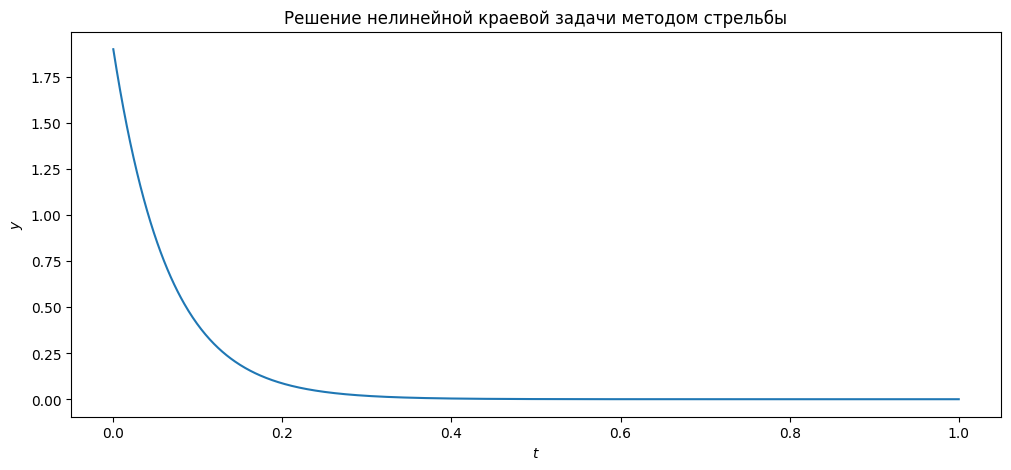

tau: 0.001

execution time: 0.001002549 seconds


In [29]:
def plot_solutions(solution_containers, multidimensionals_solution=False, parameter="order"):
    plt.figure(figsize=(12, 5))
    if multidimensionals_solution:
        for solution_container in solution_containers:
            for i in range(len(solution_container.solution.x[0])):
                plt.plot(solution_container.solution.t, [a[i] for a in solution_container.solution.x], label=f"{solution_container.name} ({i})") 
        plt.xlabel("$t$")
        plt.ylabel("$x$")
        plt.title("Интегральные кривые")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
        plt.show()
    else:
        for solution_container in solution_containers:
            plt.plot(solution_container.solution.t, [a[0] for a in solution_container.solution.x], label=f"{solution_container.name}") 
        plt.xlabel("$t$")
        plt.ylabel("$x$")
        plt.title("Интегральные кривые")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
        plt.show()
        
        plt.figure(figsize=(12, 5))
        for solution_container in solution_containers:
            plt.plot([a[0] for a in solution_container.solution.x], [a[1] for a in solution_container.solution.x], label=f"{solution_container.name}") 
        plt.xlabel("$x$")
        plt.ylabel("$\\dot(x)$")
        plt.title("Фазовые траектории")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
        plt.show()

with open(f"task7_1_data/shooting_method.csv", "r") as f:
    f.readline()
    tau = f.readline()
    duration = f.readline()
    t = []
    x = []
    for line in f:
        t_i = float(line.split(",")[0])
        x_i = list(map(float, line.split(",")))[1]
        t.append(t_i)
        x.append(x_i)
    
    plt.figure(figsize=(12, 5))
    plt.plot(t, x) 
    plt.xlabel("$t$")
    plt.ylabel("$y$")
    plt.title("Решение нелинейной краевой задачи методом стрельбы")
    plt.show()
    
    print(f"tau: {tau}")
    print(f"execution time: {duration.strip()} seconds")
